In [1]:
!pip install opencv-python dlib ultralytics pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
!ls "/content/drive/My Drive"


 01BCE0BE-DA72-4203-8F07-ED9ADED4001C.pdf
'2021-12-27 22-39-12.mp4'
 20240716111723229.pdf
 2_5274143620998381229.gdoc
 410ACDE2-FBFC-4695-8E76-2AB9345E9504.pdf
 Action
 Advance_Academy_1.4de5c831c30d.ff8a31bda19a.gsheet
 AG_19_MvsZM_19_M_IWF_2024-09-30_12h11.54.451.gsheet
 Anketa
'Apple Park.gslides'
 Articles.gdoc
 Assignment1.gdoc
'Assignment 2_decription.gdoc'
 Assignment2.gdoc
'ASSIGNMENT 2.gdoc'
 assignment3.gdoc
 Assignment4_1.gdoc
 assignment4.gdoc
 assignment6.gdoc
 Assignment6.gdoc
'Assignment 9.gdoc'
 Assinment4.rar
'A.Zhailaubek Probability Lecture week1.new.gdoc'
'Calculus koi korochee e.gdoc'
 Classroom
 CoinbaseWalletBackups
'Colab Notebooks'
'Control systems.gdoc'
 Copy_of_Face_Recognition.ipynb
'CV Mukhammed.pdf'
 DataGroup_course_description_1.51ef204b2980.gsheet
 Declaration.gdoc
'Deja vu effect.gform'
'Deja Vu effect.gslides'
'Deux Opros.gform'
'Developmental psychology.gslides'
'End Term.docx'
'End term.gdoc'
 Ex1.gsite
 EXAM
 FaceRec
'Face Recognition Report.gdoc'

Found 60 images across 6 folders.
Evaluating HOG ...
  → {'model': 'HOG', 'detection_rate': 0.9666666666666667, 'avg_time_s': 0.3639315366744995}
Evaluating HAAR ...
  → {'model': 'HAAR', 'detection_rate': 0.9666666666666667, 'avg_time_s': 0.3179512143135071}
Evaluating YOLO ...

0: 640x640 1 person, 452.1ms
Speed: 5.4ms preprocess, 452.1ms inference, 34.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x512 1 person, 224.8ms
Speed: 3.7ms preprocess, 224.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 person, 322.3ms
Speed: 4.5ms preprocess, 322.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)

0: 640x384 1 person, 251.5ms
Speed: 3.2ms preprocess, 251.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 233.4ms
Speed: 4.2ms preprocess, 233.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x544 1 person, 1 tie, 328.3ms
Speed: 4.3ms preprocess, 328.3ms inference

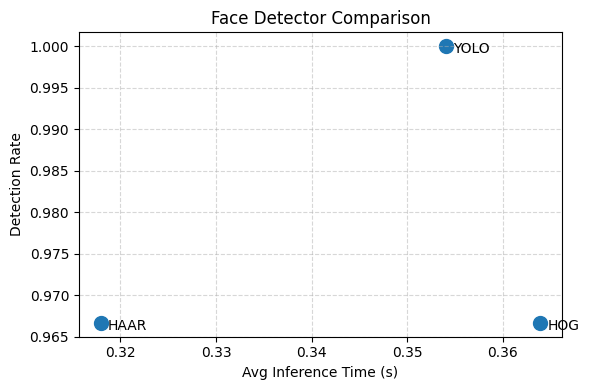

In [5]:
import os
import time
import glob

import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ─── CONFIG ───────────────────────────────────────────────────
DATASET_DIR = "/content/drive/My Drive/Images"

# ─── DETECTOR SETUP ───────────────────────────────────────────
hog_detector  = dlib.get_frontal_face_detector()
haar_detector = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
yolo_model    = YOLO("yolov8n.pt")

# ─── HELPERS ──────────────────────────────────────────────────
def gather_image_paths(root_dir):
    """Recursively collect all .jpg/.jpeg/.png under each subfolder."""
    exts = ("*.jpg", "*.jpeg", "*.png")
    paths = []
    for person in os.listdir(root_dir):
        pdir = os.path.join(root_dir, person)
        if not os.path.isdir(pdir):
            continue
        for ext in exts:
            paths.extend(glob.glob(os.path.join(pdir, ext)))
    return paths

def detect_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dets = hog_detector(gray, 1)
    return [(d.left(), d.top(), d.right(), d.bottom()) for d in dets]

def detect_haar(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = haar_detector.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=4,
        minSize=(30, 30)
    )
    # rects is an array of (x,y,w,h)
    return [(x, y, x + w, y + h) for (x, y, w, h) in rects]

def detect_yolo(img):
    results = yolo_model(img)[0]
    # each box: [x1, y1, x2, y2, conf, cls]
    return [tuple(map(int, box[:4])) for box in results.boxes.xyxy]

def evaluate(detector_name, detector_fn, image_paths):
    total = len(image_paths)
    hits = 0
    t0 = time.time()
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        boxes = detector_fn(img)
        if boxes:
            hits += 1
    elapsed = time.time() - t0
    return {
        "model": detector_name,
        "detection_rate": hits / total if total else 0,
        "avg_time_s": elapsed / total if total else 0
    }

# ─── MAIN ─────────────────────────────────────────────────────
if __name__ == "__main__":
    # 1) gather images
    image_paths = gather_image_paths(DATASET_DIR)
    print(f"Found {len(image_paths)} images across {len(os.listdir(DATASET_DIR))} folders.")

    # 2) evaluate each detector
    results = []
    for name, fn in [
        ("HOG",  detect_hog),
        ("HAAR", detect_haar),
        ("YOLO", detect_yolo)
    ]:
        print(f"Evaluating {name} ...")
        res = evaluate(name, fn, image_paths)
        print(f"  → {res}")
        results.append(res)

    # 3) tabulate
    df = pd.DataFrame(results)
    print("\nSummary:\n", df)

    # 4) plot Detection Rate vs. Avg Time
    plt.figure(figsize=(6,4))
    plt.scatter(df["avg_time_s"], df["detection_rate"], s=100)
    for _, row in df.iterrows():
        plt.annotate(
            row["model"],
            (row["avg_time_s"], row["detection_rate"]),
            textcoords="offset points",
            xytext=(5,-5)
        )
    plt.xlabel("Avg Inference Time (s)")
    plt.ylabel("Detection Rate")
    plt.title("Face Detector Comparison")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


→ Found 60 images in /content/drive/My Drive/Images/
Evaluating HOG ...  Detection Rate: 0.967, Avg Time: 0.377s
Evaluating HAAR ...  Detection Rate: 0.967, Avg Time: 0.356s
Evaluating YOLO ...
0: 640x640 1 person, 239.7ms
Speed: 4.4ms preprocess, 239.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x512 1 person, 217.8ms
Speed: 4.2ms preprocess, 217.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 person, 192.7ms
Speed: 4.5ms preprocess, 192.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x384 1 person, 142.8ms
Speed: 3.4ms preprocess, 142.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 person, 150.0ms
Speed: 3.6ms preprocess, 150.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x544 1 person, 1 tie, 194.6ms
Speed: 4.1ms preprocess, 194.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)

0: 640x480 1 person, 199.8ms
Sp

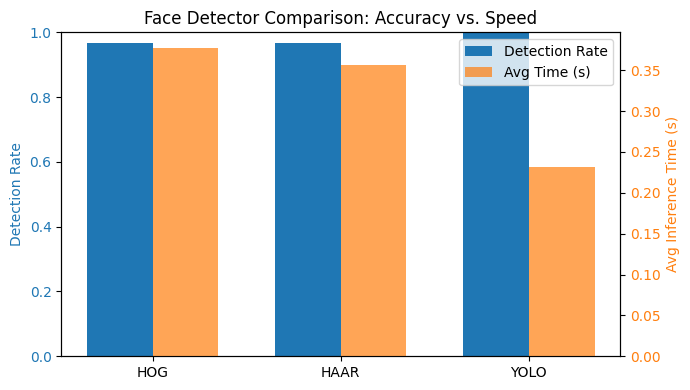

In [7]:
import os
import time
import glob

import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ─── CONFIG ────────────────────────────────────────────────────
DATASET_DIR = "/content/drive/My Drive/Images/"

# Path to a YOLOv8 weights file:
YOLO_WEIGHTS = "yolov8n.pt"

# ─── SETUP DETECTORS ───────────────────────────────────────────
hog_detector  = dlib.get_frontal_face_detector()
haar_detector = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
yolo_model    = YOLO(YOLO_WEIGHTS)

# ─── HELPERS ───────────────────────────────────────────────────
def gather_image_paths(root_dir):
    """Returns list of image paths under each person’s subfolder."""
    exts = ("*.jpg", "*.jpeg", "*.png")
    paths = []
    for person in os.listdir(root_dir):
        pdir = os.path.join(root_dir, person)
        if not os.path.isdir(pdir):
            continue
        for ext in exts:
            paths.extend(glob.glob(os.path.join(pdir, ext)))
    return paths

def detect_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dets = hog_detector(gray, 1)
    return [(d.left(), d.top(), d.right(), d.bottom()) for d in dets]

def detect_haar(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = haar_detector.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=4,
        minSize=(30,30)
    )
    return [(x, y, x+w, y+h) for (x, y, w, h) in rects]

def detect_yolo(img):
    results = yolo_model(img)[0]
    return [tuple(map(int, box[:4])) for box in results.boxes.xyxy]

def evaluate(detector_fn, image_paths):
    """
    Returns (detection_rate, avg_time_s)
    detection_rate = #images with ≥1 box / total images
    avg_time_s     = total_time / total images
    """
    total = len(image_paths)
    if total == 0:
        return 0.0, 0.0

    hits = 0
    t0 = time.time()
    for p in image_paths:
        img = cv2.imread(p)
        if img is None:
            continue
        boxes = detector_fn(img)
        if boxes:
            hits += 1
    elapsed = time.time() - t0

    return hits / total, elapsed / total

# ─── MAIN ──────────────────────────────────────────────────────
if __name__ == "__main__":
    # 1) collect all images
    image_paths = gather_image_paths(DATASET_DIR)
    print(f"→ Found {len(image_paths)} images in {DATASET_DIR}")

    # 2) evaluate each detector
    results = []
    for name, fn in [
        ("HOG",  detect_hog),
        ("HAAR", detect_haar),
        ("YOLO", detect_yolo)
    ]:
        print(f"Evaluating {name} ...", end="")
        dr, at = evaluate(fn, image_paths)
        print(f"  Detection Rate: {dr:.3f}, Avg Time: {at:.3f}s")
        results.append({
            "model": name,
            "detection_rate": dr,
            "avg_time_s": at
        })

    # 3) build DataFrame
    df = pd.DataFrame(results).set_index("model")
    print("\nSummary:\n", df)

    # 4) plot grouped bar chart
    metrics = ["detection_rate", "avg_time_s"]
    x = range(len(df))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(7,4))

    # Detection Rate bars (left axis)
    ax1.bar(
        [i - width/2 for i in x],
        df["detection_rate"],
        width,
        label="Detection Rate",
        color="C0"
    )
    ax1.set_ylabel("Detection Rate", color="C0")
    ax1.set_ylim(0,1)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df.index)
    ax1.tick_params(axis='y', labelcolor="C0")

    # Avg Time bars (right axis)
    ax2 = ax1.twinx()
    ax2.bar(
        [i + width/2 for i in x],
        df["avg_time_s"],
        width,
        label="Avg Time (s)",
        color="C1",
        alpha=0.7
    )
    ax2.set_ylabel("Avg Inference Time (s)", color="C1")
    ax2.tick_params(axis='y', labelcolor="C1")

    # Legends & Title
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper right")
    plt.title("Face Detector Comparison: Accuracy vs. Speed")
    plt.tight_layout()
    plt.show()
